In [1]:
import pystare
import pystareplotlib
import pystareplotlib.pystareplotlib as psplot
from pystareplotlib.pystareplotlib import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import numpy

<Figure size 432x288 with 0 Axes>

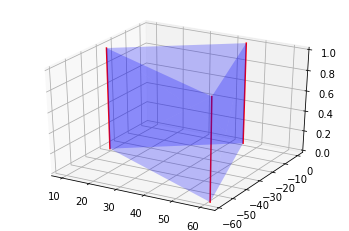

In [2]:
sp = stare_prism(siv=1,tiv_mock=[0,1])

fig = plt.figure() 
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax = add_coastlines(usr_figax)

# ,colors=plt.cm.CMRmap
usr_figax = sp.plot0(
    usr_figax
    ,color='blue'
    ,alpha=0.25
    ,prism_edge_color='red'
    ,end_faces_plot=[False,False]
)

usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

plt.show() 
del usr_figax

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43

Full spatial id:              0x2c2401f47797ec43
Geolocation part (bits 61-5): 0x2c2401f47797ec40
Resolution part  (bits  4-0): 0x0000000000000003


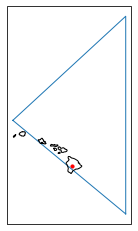

In [3]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444

# Set some unit assumptions
km  = 1
deg = 1

# Set the length scale of a neighborhood triangular element (trixel) about the location.
resolution_scale_km = 1000*km

# Determine the resolution, i.e. the level of the spatial quadtree, of that length scale.
spatial_resolution_level = int(pystare.spatial_resolution_from_km(resolution_scale_km))

# Calculate the spatial index value.
spatial_id = pystare.from_latlon([lat],[lon],spatial_resolution_level)

# Print to check.
print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,pystare.spatial_resolution_from_km(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))
print()
print('Full spatial id:              %s'%(hex16(spatial_id[0])))
print('Geolocation part (bits 61-5): %s'%(hex16(spatial_id[0] & (~31))))
print('Resolution part  (bits  4-0): %s'%(hex16(spatial_id[0] & ( 31))))

# Plot the trixel associated with the spatial index value
usr_figax = hello_plot(spatial_id,show_fig=False)
# usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.show()
del usr_figax

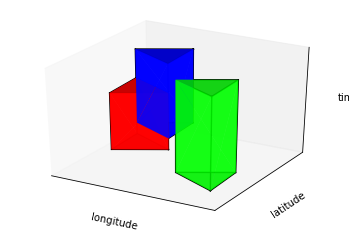

In [4]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax = hello_plot(spatial_id,show_fig=False)

if False:
    sp = stare_prism(siv=1,tiv_mock=[0,1]
    #                 ,color_reverse='red'
    #                 ,color='red'
    #                 ,color_forward='red'
                    )
    # ,colors=plt.cm.CMRmap
    sp.plot1(
        usr_figax
    #    ,color='blue'
        ,alpha=0.8
    #    ,prism_edge_color='k'
    #    ,edge_color='k'
    )

if False:
    for siv in [10,11,12,13,14]:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([(siv-9.0)/5,0.5,(15-siv)/5])
                        )
        sp.plot1(
            usr_figax
            ,alpha=(siv-9)/6.0
            ,prism_edge_color='k'
        )

spatial_id[0] = (spatial_id[0] & (~31)) | 10
        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]+spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,1,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.75])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.7
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )   
        
if True:
    for siv in spatial_id:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([1,0,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      

        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      
                 
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

[2254133897072410877 2254133931432156013 2254133970086871037]
<class 'numpy.ndarray'>


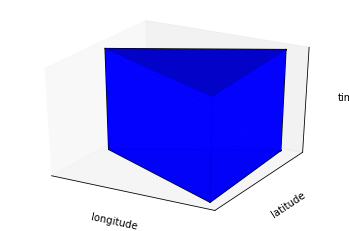

In [5]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))


if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,tiv=numpy.array([0x1f484ade232b1b6d],dtype=numpy.int64)
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )     

#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax